In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from GradientBoostedTreesRegressor import GradientBoostedTreesRegressor
from GradientBoostedTreesClassifier import GradientBoostedTreesClassifier

# Iris Dataset | Classification

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Features:", feature_names)
print("Target labels:", target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target labels: ['setosa' 'versicolor' 'virginica']


In [3]:
random_forest = GradientBoostedTreesClassifier(
    num_trees=10,
    learning_rate=1e-3,
    min_samples_per_node=5,
    max_depth=5,
    # impurity_measure='variance',
    num_targets=3
)

wawa = random_forest.build_forest(X_train, y_train)

In [4]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[1] 1
[0] 0
[2] 2
[1] 1
[1] 1
[0] 0
[1] 1
[2] 2
[1] 1
[1] 1
[2] 2
[0] 0
[0] 0
[0] 0
[0] 0
[1] 1
[2] 2
[1] 1
[1] 1
[2] 2
[0] 0
[2] 2
[0] 0
[2] 2
[2] 2
[2] 2
[2] 2
[2] 2
[0] 0
[0] 0


# Breast Cancer Dataset | Classification

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame=True)
X, y = cancer.data.to_numpy(), cancer.target.to_numpy()
# print(X.head())  # Display first few rows

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(cancer.target_names)  # Display target classes

['malignant' 'benign']


In [15]:
random_forest = GradientBoostedTreesClassifier(
    num_trees=10,
    min_samples_per_node=5,
    max_depth=100,
    impurity_measure='entropy',
    num_targets=2
)

In [16]:
wawa = random_forest.build_forest(X_train, y_train)

In [17]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[0] 0
[0] 0
[0] 0
[0] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[1] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[1] 1
[0] 1
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[0] 1
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[0] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[0] 0
[1] 1
[1] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[0] 0
[0] 0
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[0] 1
[1] 1
[0] 0
[1] 1
[1] 1
[0] 0


# Diabetes Dataset | Regression

In [23]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data.to_numpy(), diabetes.target.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
random_forest = GradientBoostedTreesRegressor(
    min_samples_per_node=5,
    max_depth=10,
    impurity_measure='variance',
    # num_targets=2
)

In [25]:
wawa = random_forest.build_forest(X_train, y_train)

In [26]:
for inde in range(X_test.shape[0]):
    print(wawa.predict(X_test[inde]), y_test[inde])

[376.45602671] 219.0
[166.15189125] 70.0
[384.47334596] 202.0
[171.16184027] 230.0
[244.66413744] 111.0
[137.24255423] 84.0
[314.76414968] 242.0
[341.18891037] 272.0
[259.88999032] 94.0
[431.84283928] 96.0
[135.04832278] 94.0
[395.55203725] 252.0
[103.00387605] 99.0
[316.52232745] 297.0
[366.39244641] 135.0
[190.35118888] 67.0
[410.0486514] 295.0
[231.40763526] 264.0
[401.28593379] 170.0
[244.8509906] 275.0
[224.34947883] 310.0
[77.64595499] 64.0
[79.68211247] 128.0
[380.70522621] 232.0
[123.50327745] 129.0
[438.27759065] 118.0
[412.20884296] 263.0
[254.87454764] 77.0
[67.08090501] 48.0
[251.45595334] 107.0
[357.17055554] 140.0
[62.41450316] 113.0
[444.71234202] 90.0
[405.6261041] 164.0
[230.90701107] 180.0
[238.9590703] 233.0
[106.93805187] 42.0
[154.97838756] 84.0
[391.67785153] 172.0
[110.156923] 63.0
[69.38103245] 48.0
[126.58556] 108.0
[282.19025358] 156.0
[194.75392221] 168.0
[399.39547397] 90.0
[113.15536865] 52.0
[35.24589924] 200.0
[219.05529377] 87.0
[71.68115988] 90.0
[267.4

# Sine Wave | Regression

Reference: https://colab.research.google.com/drive/1YY7xaI1rRuVcrS-sCFTnMX5rPf2qFS8v#scrollTo=k-_xGd4vXcjN

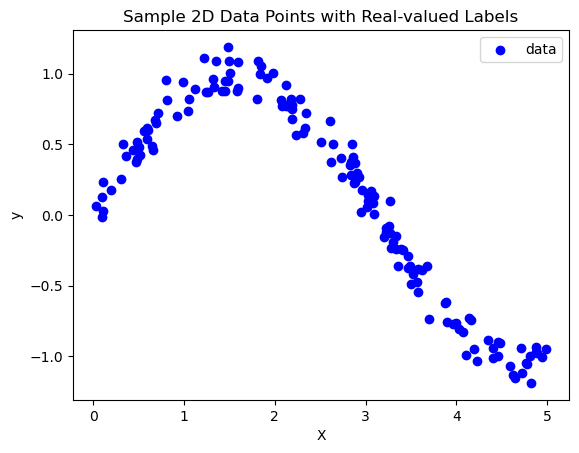

In [27]:
np.random.seed(0)
import matplotlib.pyplot as plt

n_samples = 150

X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randn(n_samples)*0.1

plt.figure()
plt.scatter(X, y, color='blue', label='data')
plt.title('Sample 2D Data Points with Real-valued Labels')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [42]:
random_forest = GradientBoostedTreesRegressor(
    num_trees=20,
    min_samples_per_node=5,
    max_depth=10,
    impurity_measure='variance',
    learning_rate=1e-4
).build_forest(X_train, y_train)

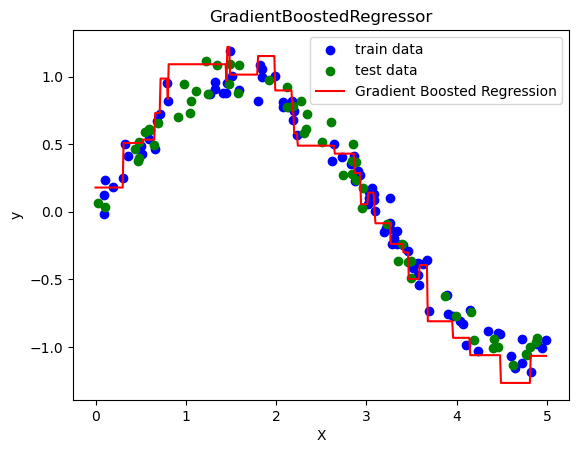

In [43]:
X_grid = np.arange(0, 5, 0.01)[:, np.newaxis]
y_preds= []
for x in X_grid:
    y_preds.append(random_forest.predict(x))

y_preds = np.array(y_preds)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.scatter(X_test, y_test, color='green', label='test data')
plt.plot(X_grid, y_preds, color='red', label='Gradient Boosted Regression')
plt.title('GradientBoostedRegressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Toy Multiout-Regression Problem c/o sklearn

Feature matrix shape (X): (2000, 10)
Target matrix shape (y): (2000, 3)


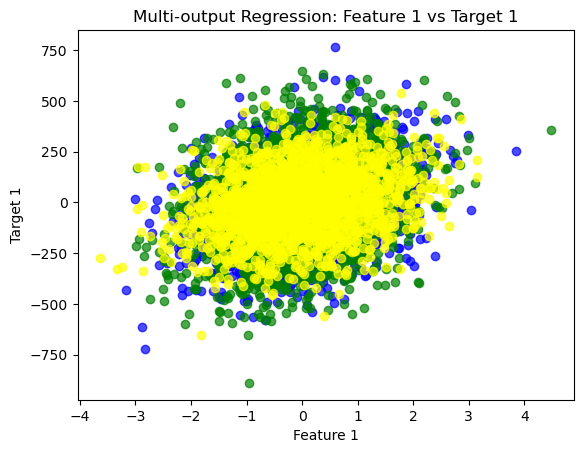

In [44]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate synthetic multi-output regression data
X, y = make_regression(
    n_samples=2000,      # Number of samples
    n_features=10,       # Number of input features
    n_informative=10,    # Number of informative features
    n_targets=3,        # Number of target variables (multi-output)
    noise=0.1,          # Add some noise
    random_state=42     # Reproducibility
)

print("Feature matrix shape (X):", X.shape)
print("Target matrix shape (y):", y.shape)

# Visualize one target dimension against a feature (optional)
plt.scatter(X[:, 0], y[:, 0], alpha=0.7, color='blue')
plt.scatter(X[:, 1], y[:, 1], alpha=0.7, color='green')
plt.scatter(X[:, 2], y[:, 2], alpha=0.7, color='yellow')
plt.xlabel("Feature 1")
plt.ylabel("Target 1")
plt.title("Multi-output Regression: Feature 1 vs Target 1")
plt.show()


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [48]:
decision_tree = GradientBoostedTreesRegressor(
    num_trees=10,
    min_samples_per_node=5,
    max_depth=10,
    impurity_measure='variance',
    num_targets=3,
    learning_rate=1e-4
).build_forest(X_train, y_train)

In [50]:
for inde in range(X_test.shape[0]):
    print(decision_tree.predict(X_test[inde]), y_test[inde])

[67.81320633 51.71610308 42.42787126] [ 51.51376112 108.2763559   65.48800266]
[-143.51228343 -112.59657144   72.99676171] [ -4.22524152 -87.4679486  157.90423513]
[68.04729412 51.89462448 42.57433014] [352.7953725  396.79656744 285.37860287]
[ -91.21914306 -246.46716646   25.53166714] [ -95.26854204 -240.25767748  -64.07139251]
[136.38776698 324.55857616 246.31960094] [161.39201538 429.68203544 247.10275011]
[ 127.97113051 -351.68791089  -87.1040132 ] [-247.33141915 -393.27808638 -294.15961985]
[506.46768118 171.71099854 115.7707808 ] [287.79272654 262.10486864 143.50551956]
[-241.54916333 -498.86658708 -200.60927168] [192.52069989 153.60006256 260.30567266]
[-225.62934021  -94.28809883 -100.1341902 ] [-58.90650677 -26.65692704  29.46327775]
[-632.22198725 -496.97607899 -468.95288546] [-296.9159578  -183.63041729 -279.8945684 ]
[ 18.0672818  417.02743271 356.86477063] [102.44358885 185.26860835 245.89894464]
[300.36811346 680.2955499  298.71445991] [104.58519933 613.65526948 207.65868

In [ ]:
for inde in range(X_test.shape[0]):
    print(decision_tree.predict(X_test[inde]), y_test[inde])

[ 27.04521211 127.6499555   65.62656413] [ 51.51376112 108.2763559   65.48800266]
[-24.70279776 -45.94545463  90.05957389] [ -4.22524152 -87.4679486  157.90423513]
[177.40634485 242.47463308 131.10087823] [352.7953725  396.79656744 285.37860287]
[ -93.68619844 -169.83873465  -50.10284709] [ -95.26854204 -240.25767748  -64.07139251]
[118.42845272 248.18851246 147.24524687] [161.39201538 429.68203544 247.10275011]
[-171.41182858 -306.61820658 -209.14494047] [-247.33141915 -393.27808638 -294.15961985]
[201.37079838 168.71469273  82.41725105] [287.79272654 262.10486864 143.50551956]
[126.36307839 112.7703632   88.02618219] [192.52069989 153.60006256 260.30567266]
[-52.40355078 -56.75569486  -2.22647045] [-58.90650677 -26.65692704  29.46327775]
[-155.93961098 -140.23468023 -139.36500649] [-296.9159578  -183.63041729 -279.8945684 ]
[ 21.63498763 155.0430137  144.20866427] [102.44358885 185.26860835 245.89894464]
[179.24663496 343.35057282 156.33274289] [104.58519933 613.65526948 207.65868684